# W207 Final Project
## Data Exploration
### Erin Werner

In [13]:
import numpy as np
import urllib
import scipy.optimize
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from collections import Counter
import statistics
from operator import itemgetter
import json
from sklearn.metrics import mean_squared_error
from sklearn import svm
import math
from sklearn.utils import shuffle
import pandas as pd
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

In [4]:
my_test = pd.read_csv("/Users/erinwerner/Downloads/18_2157_bundle_archive/Reviews.csv")

In [5]:
my_test[0:5]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
my_test['PercentHelpful'] = (my_test['HelpfulnessNumerator']/my_test['HelpfulnessDenominator'])*100

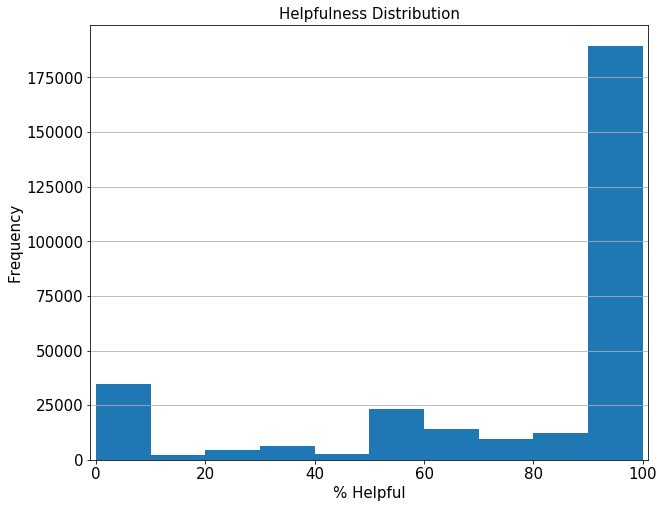

In [7]:
plt.figure(figsize=[10,8])

plt.hist(my_test['PercentHelpful'].dropna().values, bins = [0,10,20,30,40,50,60,70,80,90,100])

plt.xlim(-1, 101)
plt.grid(axis='y')
plt.xlabel('% Helpful',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Helpfulness Distribution',fontsize=15)
plt.show()

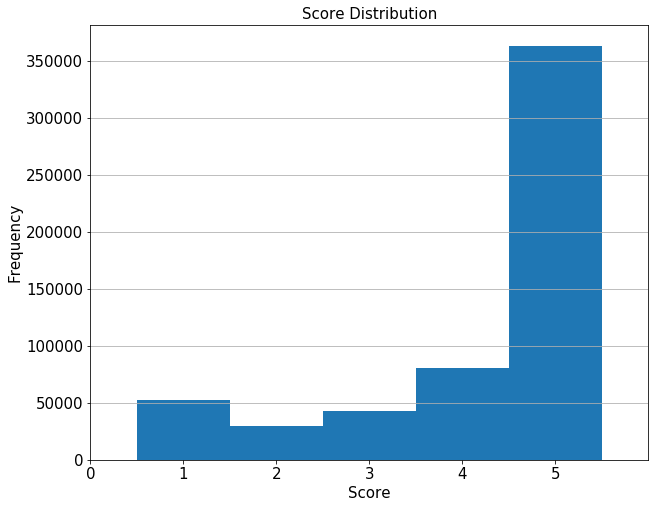

In [8]:
plt.figure(figsize=[10,8])
bins = np.arange(7) - 0.5

plt.hist(my_test['Score'], bins)

plt.xlim(0, 6)
plt.grid(axis='y')
plt.xlabel('Score',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(range(6), fontsize=15)
plt.yticks(fontsize=15)
plt.title('Score Distribution',fontsize=15)
plt.show()

In [32]:
userScores = defaultdict(list)
productScores = defaultdict(list)
userProducts = defaultdict(list)
productUsers = defaultdict(list)

product,user,score = my_test['ProductId'],my_test['UserId'],my_test['Score']

for i in range(0,len(my_test)):
    userScores[user[i]].append(score[i])
    productScores[product[i]].append(score[i])
    userProducts[user[i]].append(product[i])
    productUsers[product[i]].append(user[i])

In [ ]:
#Notes: 

#Euclidean distance

# Jaccard similarity between users, 1 if same set of items reviewd -> 0 if disjoint

# Cosine similarity (-1, 0, 1)

# *Pearson correlation 

# *Collaborative filtering: 

# Latent Factor models: *screenshot, using gradient descent - not convex, alternating least squares

# dimensionality reductions: 